# Importer les modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

# Régression linéaire simple

In [3]:
simple = pd.read_csv("data/reg_simple.csv")
sns.set(style='white')

In [4]:
simple.head()

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


In [5]:
x = np.array(simple.heure_rev)
y = np.array(simple.note)

In [6]:
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

In [7]:
StdScaler = StandardScaler()
x = StdScaler.fit_transform(x)
y = StdScaler.fit_transform(y)

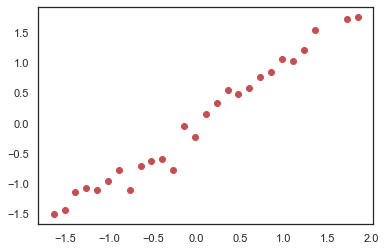

In [8]:
plt.scatter(x, y, c='r')
plt.show()

In [9]:
model = LinearRegression()
model.fit(x, y)
model.coef_

array([[0.98657]])

In [10]:
y_pred = model.predict(x)

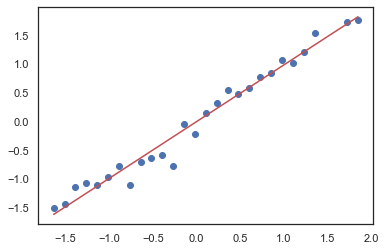

In [11]:
plt.scatter(x, y)
plt.plot(x, y_pred, color="r")
plt.show()

## Scores du modèle

In [12]:
model.score(x, y)

0.9733203596683907

In [13]:
mean_squared_error(y, y_pred)

0.026679640331609286

In [14]:
mean_absolute_error(y, y_pred)

0.11684425673659528

# Régression linéaire multiple

In [128]:
multiple = pd.read_csv("data/boston_house_prices.csv")

In [129]:
x = np.array(multiple.iloc[:, [5,12]])
y = np.array(multiple['MEDV'])
y = y.reshape(y.shape[0], 1)

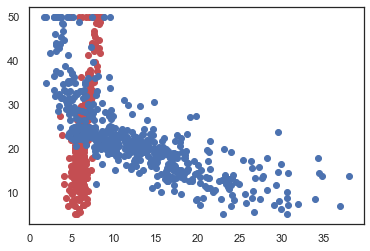

In [130]:
plt.scatter(x[:,0], y, color='r')
plt.scatter(x[:,1], y, color='b')

In [131]:
model = LinearRegression()
model.fit(x, y)
model.coef_

array([[ 5.09478798, -0.64235833]])

In [132]:
y_pred = model.predict(x)

<Figure size 432x288 with 0 Axes>

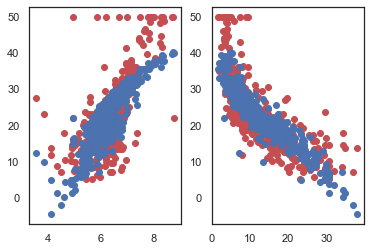

In [133]:
f = plt.figure()
f, axes = plt.subplots(1,2)

axes[0].scatter(x[:,0], y, color='r')
axes[0].scatter(x[:,0], y_pred, color='b')

axes[1].scatter(x[:,1], y, color='r')
axes[1].scatter(x[:,1], y_pred, color='b')

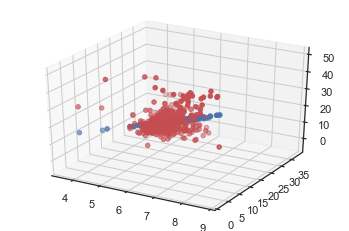

In [134]:
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y, color='r')
ax.scatter(x[:,0], x[:,1], y_pred, color='b')
plt.show()

In [135]:
model.score(x, y)

0.6385616062603403

In [136]:
mean_squared_error(y, y_pred)

30.51246877729947

In [137]:
mean_absolute_error(y, y_pred)

3.9525800671192717

# Régression linéaire polynomiale

In [118]:
poly = pd.read_csv("data/Position_Salaries.csv")

In [119]:
x = np.array(poly['Level'])
y = np.array(poly['Salary'])
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

In [120]:
StdScaler = StandardScaler()
x = StdScaler.fit_transform(x)
y = StdScaler.fit_transform(y)

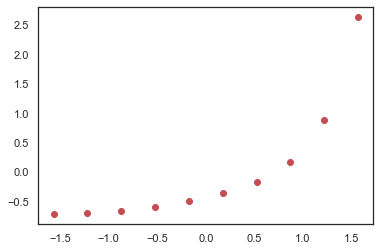

In [121]:
plt.scatter(x, y, c='r')

In [122]:
model = LinearRegression()
model.fit(x, y)
model.coef_

array([[0.81794941]])

In [123]:
y_pred = model.predict(x)

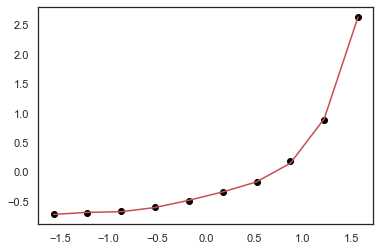

In [124]:
poly = PolynomialFeatures(degree=5)
x_poly = poly.fit_transform(x)
poly.fit(x_poly, y)

model = LinearRegression()
model.fit(x_poly, y)

y_pred = model.predict(x_poly)

plt.plot(x, y_pred, c="r")
plt.scatter(x, y, c="black")

In [125]:
model.score(x_poly, y)

0.9997969027099755

In [126]:
mean_squared_error(y, y_pred)

0.00020309729002456926

In [127]:
mean_absolute_error(y, y_pred)

0.011833482230246228

# Régression linéaire multiple (vins)

In [99]:
vins = pd.read_csv("data/qualite-vin-rouge.csv")

In [100]:
x = np.array(vins.iloc[:, 0:11])
y = np.array(vins['qualité'])
y = y.reshape(y.shape[0], 1)

In [102]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [103]:
y_pred = model.predict(x)

<Figure size 432x288 with 0 Axes>

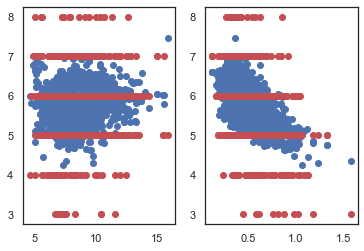

In [104]:
f = plt.figure()
f, axes = plt.subplots(1,2)

axes[0].scatter(x[:,0], y_pred, color='b')
axes[0].scatter(x[:,0], y, color='r')

axes[1].scatter(x[:,1], y_pred, color='b')
axes[1].scatter(x[:,1], y, color='r')

In [105]:
model.score(x, y)

0.3605517030386879

In [106]:
mean_squared_error(y, y_pred)

0.4167671672214082

In [107]:
mean_absolute_error(y, y_pred)

0.500489963564488